In [84]:
#Import Packages#
import pandas as pd
import numpy as np
import dask.dataframe as dd
from tensorflow.keras import datasets            
from sklearn.metrics import confusion_matrix      
import matplotlib.pyplot as plt                   
import numpy as np                               
import seaborn as sns; sns.set()                  
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers               
from tensorflow.keras import Sequential           
from keras.callbacks import ModelCheckpoint       
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  

In [85]:
(X_Train, Y_Train), (X_Test, Y_Test) = datasets.fashion_mnist.load_data()
Label_Name = ['T-Shirt','Trouser','Pullover','Dress','Coat',
            'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [86]:
#Normalize#
X_Train = X_Train.astype('float32') / 255
X_Test = X_Test.astype('float32') / 255

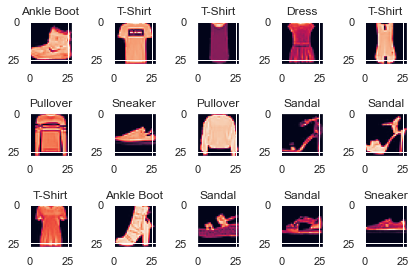

In [87]:
#View Images#
fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(X_Train[i])
  axi.set_title(Label_Name[Y_Train[i]])
plt.show()

In [88]:
w, h = 28, 28
Neural_NetworkTrainX = X_Train.reshape(X_Train.shape[0], w*h)
Neural_NetworkTestX = X_Test.reshape(X_Test.shape[0], w*h)

gnb_model = GaussianNB()
%time gnb_model.fit(Neural_NetworkTrainX, Y_Train)

Wall time: 920 ms


GaussianNB()

In [89]:
NBY = gnb_model.predict(Neural_NetworkTestX)

In [106]:
print(classification_report(Y_Test, NBY, target_names=Label_Name))

              precision    recall  f1-score   support

     T-Shirt       0.81      0.59      0.68      1000
     Trouser       0.64      0.94      0.76      1000
    Pullover       0.59      0.32      0.42      1000
       Dress       0.44      0.55      0.49      1000
        Coat       0.38      0.78      0.51      1000
      Sandal       0.93      0.28      0.43      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.51      0.99      0.67      1000
         Bag       0.83      0.71      0.77      1000
  Ankle Boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



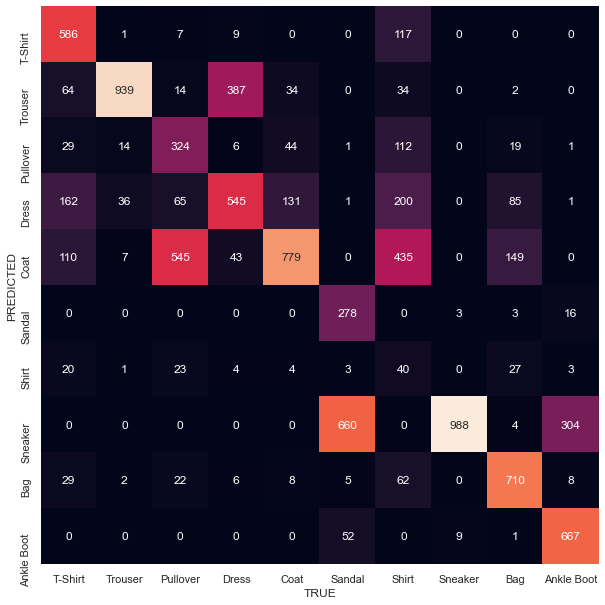

In [107]:
TMM = confusion_matrix(Y_Test, NBY)
plt.figure(figsize=(10, 16))
sns.heatmap(TMM.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Label_Name,
            yticklabels=Label_Name)
plt.xlabel('TRUE')
plt.ylabel('PREDICTED');

In [92]:
w, h = 28, 28
dt_x_train = X_Train.reshape(X_Train.shape[0], w*h)
dt_x_test = X_Test.reshape(X_Test.shape[0], w*h)

dt_model = DecisionTreeClassifier()
%time dt_model.fit(dt_x_rain, Y_Train)

Wall time: 55.2 s


DecisionTreeClassifier()

In [93]:
dt_y_fit = dt_model.predict(dt_x_test)

In [95]:
print(classification_report(Y_Test, dt_y_fit, target_names=Label_Name))

              precision    recall  f1-score   support

     T-Shirt       0.75      0.74      0.75      1000
     Trouser       0.96      0.95      0.96      1000
    Pullover       0.64      0.65      0.64      1000
       Dress       0.82      0.78      0.80      1000
        Coat       0.66      0.65      0.65      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.52      0.55      0.53      1000
     Sneaker       0.87      0.90      0.88      1000
         Bag       0.91      0.91      0.91      1000
  Ankle Boot       0.91      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



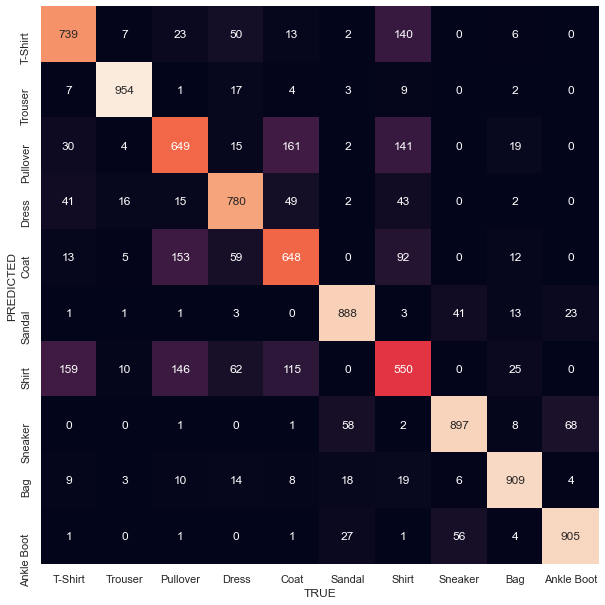

In [108]:
TMM = confusion_matrix(Y_Test, dt_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(TMM.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Label_Name,
            yticklabels=Label_Name)
plt.xlabel('TRUE')
plt.ylabel('PREDICTED');

In [99]:
#Prep data for Neural Network#
w, h = 28, 28
nn_x_train = X_Train.reshape(X_Train.shape[0], w, h, 1)
nn_x_test = X_Test.reshape(X_Test.shape[0], w, h, 1)
nn_y_train = to_categorical(Y_Train, 10)

In [100]:
nn_model = Sequential()

#Neural Network#
nn_model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))
nn_model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))
nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(256, activation='relu'))
nn_model.add(layers.Dropout(0.5))
nn_model.add(layers.Dense(10, activation='softmax'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
%time nn_model.fit(nn_x_train, nn_y_train, batch_size=64, epochs=10, callbacks=[checkpointer])

Epoch 1/10
938/938 [==============================] - 97s 103ms/step - loss: 0.8046 - accuracy: 0.7000
Epoch 2/10
938/938 [==============================] - 94s 100ms/step - loss: 0.4221 - accuracy: 0.8445
Epoch 3/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3705 - accuracy: 0.8659
Epoch 4/10
938/938 [==============================] - 95s 102ms/step - loss: 0.3437 - accuracy: 0.8743
Epoch 5/10
938/938 [==============================] - 95s 101ms/step - loss: 0.3228 - accuracy: 0.8814
Epoch 6/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3085 - accuracy: 0.8875
Epoch 7/10
938/938 [==============================] - 96s 102ms/step - loss: 0.2923 - accuracy: 0.8915
Epoch 8/10
938/938 [==============================] - 95s 101ms/step - loss: 0.2808 - accuracy: 0.8970
Epoch 9/10
938/938 [==============================] - 95s 101ms/step - loss: 0.2768 - accuracy: 0.8991
Epoch 10/10
938/938 [==============================] - 96s 102ms/step - l

In [101]:
nn_prediction_results = nn_model.predict(nn_x_test)
nn_y_fit = np.full((10000,), 0, dtype='uint8')

for i in range(0, len(nn_prediction_results)-1, 1):
  nn_y_fit[i] = np.argmax(nn_prediction_results[i])

In [104]:
print(classification_report(Y_Test, nn_y_fit, target_names=Label_Name))

              precision    recall  f1-score   support

     T-Shirt       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.80      0.91      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.82      0.65      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



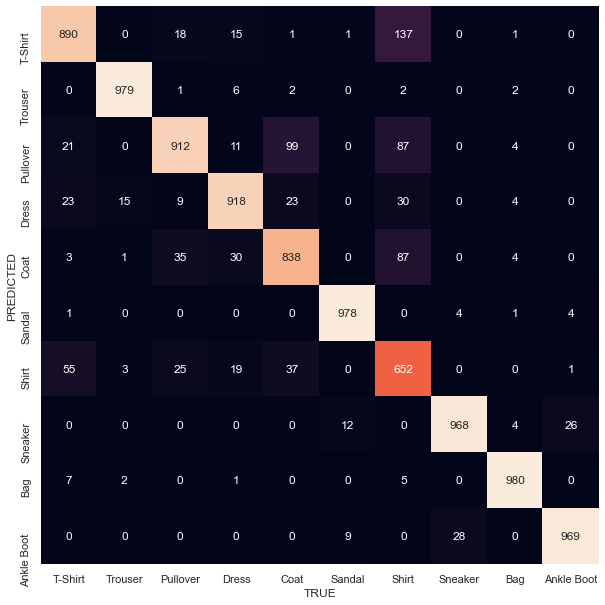

In [109]:
TMM = confusion_matrix(Y_Test, nn_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(TMM.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Label_Name,
            yticklabels=Label_Name)
plt.xlabel('TRUE')
plt.ylabel('PREDICTED');